In [7]:
# Data Munging
# Importing libraries 
import numpy as np 
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns

# !pip3 install pyjanitor # run this once

import sklearn 
from sklearn.impute import KNNImputer
from sklearn import preprocessing
data = pd.read_csv('../data/mushrooms.csv')
data.info() # We want to see the data types and how many null values do we have in the dataset.  
data.columns # We want to clean column names automatically by replacing each - with _
data = data.clean_names()
data.columns # Check column names after automatic cleaning
data.describe()
# We want to see what different values each column contains
# From here, we can see that the veil_type has one single value and therefore is redundant and not informative so we can proceed with dropping it 
data.columns.tolist()
for col in data.columns.tolist(): 
    print(col,':  ',data[col].unique())
data.drop('veil_type', axis = 1, inplace = True)
# We can see that columns have multiple repetitive values (letters), even though they mean different things in each column. 
# This might cause some problems like duplications when we create dummy variables for these categorical values. 

# We can also see that the column 'stalk_root' has a non-alphanumeric value and it might need some munging. 
# According to the dataset's documentation, the value '?' in stalk_root means that they are missing or unknown stalk root data. 
# Let's see how many of these missing values we have to decide if it'd be okay to drop these rows. 

vals = data['stalk_root'].value_counts().index.values.tolist()

NA_count = data['stalk_root'].value_counts().values

NA_frac = data['stalk_root'].value_counts().to_list()
NA_frac = [i/sum(NA_frac) for i in NA_frac]

pd.DataFrame(zip(NA_count,NA_frac), columns=['Count','Fraction'], index= vals)

# So, now we can see that if we drop the missing values in this column we're losing 30% of our data which accounts for about 2500 instances. 
# Dropping the rows is not the best solution in this case. 
# Therefore, we'll try to impute using KNN.
# Before that, the categorical value must be numerically encoded/labelled from 0 to n. 


# ['population', 'cap_shape', 'stalk_shape', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_below_ring']
# Let's see the order of values in this column
data.stalk_root.unique()
le = preprocessing.LabelEncoder()

for i in data.columns.tolist():
    data[i]= le.fit_transform(data[i])

data
# Order of values after encoding 
data['stalk_root'].unique()
# But, for the models to impute the missing data, we should replace each 4 with a NaN. 
data.replace({'stalk_root': {0: np.nan}}).stalk_root.value_counts()
imputer = KNNImputer(missing_values = np.nan, n_neighbors=5, weights = 'distance')
imputer.fit_transform(data[['stalk_root']])
data.stalk_root.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

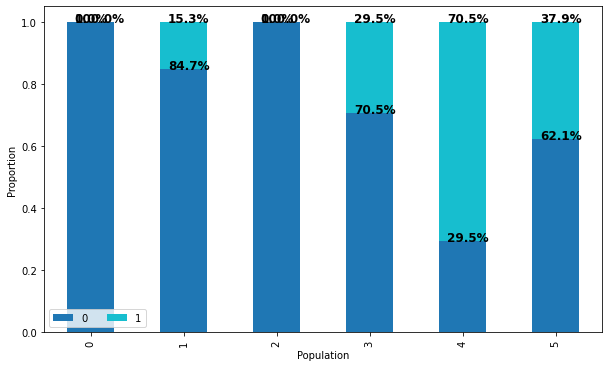

In [8]:
# Population vs class 

cross_tab_prop = pd.crosstab(index=data['population'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Population")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

The main objective of our EDA is to find the variables that have the most effect on the mushroom class. Here we can see if the population is abundant or numerous then the class will definitely be edible

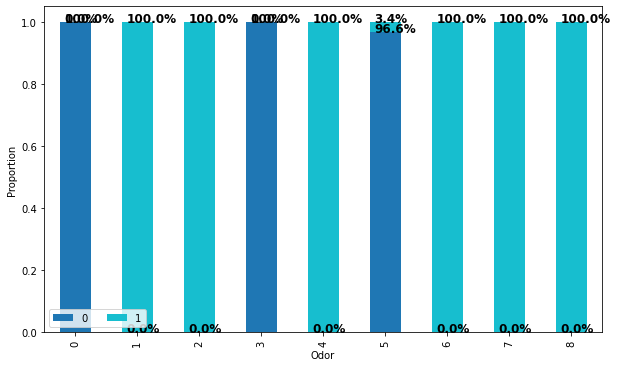

In [9]:
# Odor vs class

cross_tab_prop = pd.crosstab(index=data['odor'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Odor")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

The second graph is for the proportion of the smell. So you can almost identify if it is edible or not by the smell. Only number 4 has a slight variation with 3.4%. This can indicate that this column will have a significant effect on our classification model.

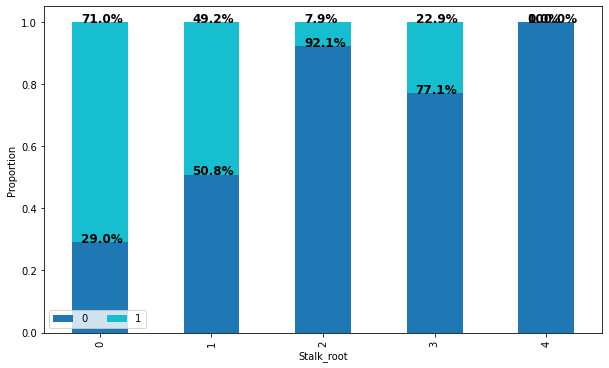

In [12]:
cross_tab_prop = pd.crosstab(index=data['stalk_root'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Stalk_root")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks

### Insight: 
   ##### We see that if the mushroom has a __club__, __cup__, or __rooted__ stalk root, then there is a low chance for it to be poisonous. However, if the root is __bulbous__ then a chance of 49.2% is that the mushroom is poisonous. Moreover, in the dataset we have 2480 mushrooms with a __missing__ stalk root.


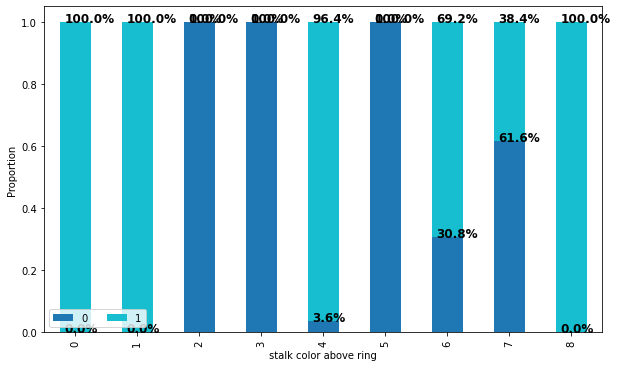

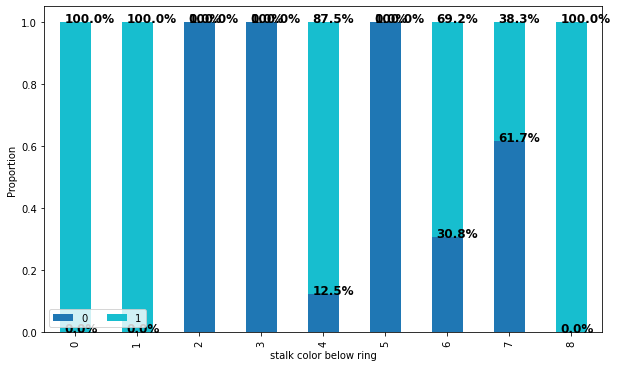

In [14]:
# Stalk_color vs class

# stalk_color_above_ring

cross_tab_prop = pd.crosstab(index=data['stalk_color_above_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk color above ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

# stalk_surface_below ring

cross_tab_prop = pd.crosstab(index=data['stalk_color_below_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk color below ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks

### Insight: 
   ##### For the stalk color, we see that the percentage are similar for above & below ring. Mushrooms with these stalk colors: __buff__, __cinnamon__, and __yellow__ either above or below ring, have 100% percentage of being poisonous. On the other hand, mushrooms with these stalk colors: __red__, __gray__, and __orange__ either above or below ring, have 0% percentage of being poisonous. Also, 38.3% of white colored stalk mushrooms are poisonous, and 69.2% of pink colored stalk mushrooms are poisonous, and brown colored stalk mushrooms have an average percentage of 92.0% for being poisonous.
   ##### Notes: in this dataset,
      1- There are only 8 yellow, 36 cinnamon for stalk color above the ring.
      2- There are only 24 yellow, 36 cinnamon for stalk color below the ring.
      3- Also, the 36 cinnamon stalk colored mushrooms have both cinnamon color above and below ring.


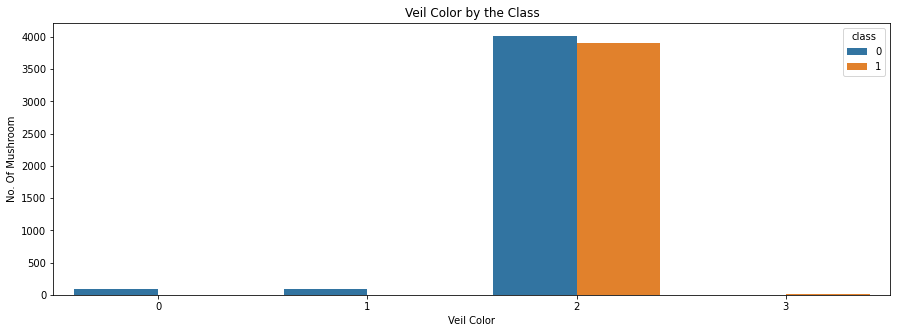

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'veil_color' , hue = 'class' , data = data )
plt.title('Veil Color by the Class')
plt.xlabel('Veil Color')
plt.ylabel('No. Of Mushroom');

From the graph, we can see that the Veil Color can be used to know the class of the mushroom except when the color is white.